<a href="https://colab.research.google.com/github/Baldros/NLP-Course-HuggingFace/blob/main/2.3.%20Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    Vamos agora para um dos tópicos mais importantes no que se refere
    a LLMs. A técnica de tokenização é fundamental para todo o funcionamento
    de um modelo e Linguagem Natual.

**Tokenizadores**

    Os tokenizadores são um dos componentes principais do pipeline de
    PNL (Processamento de Linguagem Natural). Eles têm um propósito único:
    Traduzir texto em dados que podem ser processados pelo modelo, lembre-se
    que um computadores nada mais são que máquinas de calcular, ou seja,
    os modelos só podem processar números, e tokenizadores foram a
    solução inteligente pensados para fazer essa conversão.
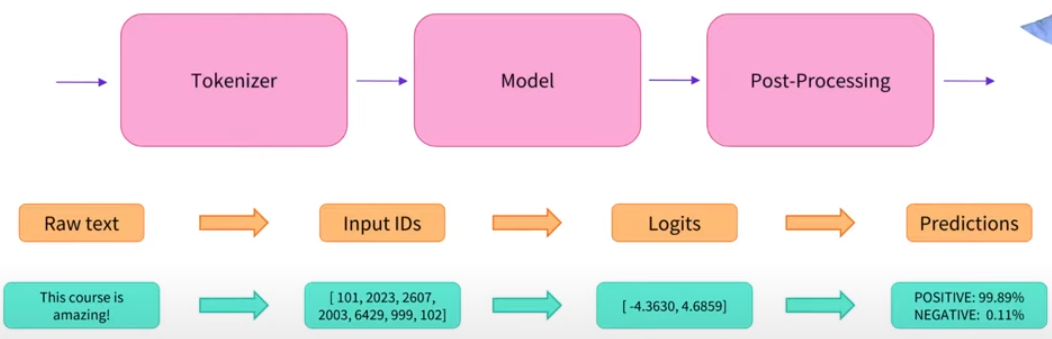

    O processo de tokenização é feito sobre as uma estrutura linguistica,
    e o curso define três formas de se tokenizar, tokenização baseada
    em palavras, tokenização baseada em caracteres, e tokenização
    baseada em subpalavras.
  

# Tokenização Baseada em Palavras:

    Talvez possa ter sido a primeira coisa que você tenha pensado
    em fazer. Pega uma palavra, atribui um valor e fazas contas.
    Mas não funciona bem assim.

In [ ]:
# Exemplo de frase:
tokenized_text = "Eu gosto de maçã e de pera".split()
print(tokenized_text)

['Eu', 'gosto', 'de', 'maçã', 'e', 'de', 'pera']


In [ ]:
# Biblioteca para lidar com dataframes:
import pandas as pd

In [ ]:
# Construindo DataFrame:
dicionario_msg = {'texto': tokenized_text}
df_texto = pd.DataFrame(dicionario_msg);df_texto

,texto
0,Eu
1,gosto
2,de
3,maçã
4,e
5,de
6,pera


In [ ]:
# Construindo matriz de ocorrência:
df_texto['texto'].str.get_dummies(" ")

,Eu,de,e,gosto,maçã,pera
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
5,0,1,0,0,0,0
6,0,0,0,0,0,1


**Visualização**

    Podemos refinar ainda mais essa visualização.

In [ ]:
# biblioteca para visualização:
import matplotlib.pyplot as plt

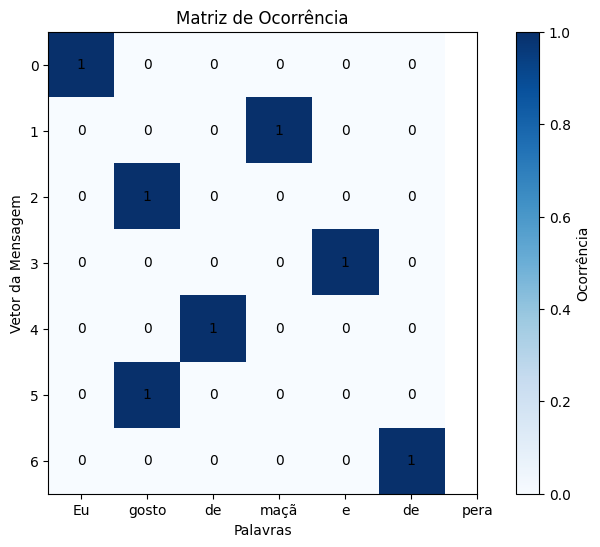

In [ ]:
# Extraindo as palavras:
palavras = df_texto['texto'].values

# Extrando as ocorrencias:
ocorrencias = df_texto['texto'].str.get_dummies(" ").to_numpy()

# Plotando a matriz de ocorrência
plt.figure(figsize=(10, 6))
plt.imshow(ocorrencias, cmap='Blues', interpolation='nearest')

# Adicionando rótulos aos eixos
plt.xticks(range(len(palavras)), palavras)
plt.yticks(range(len(ocorrencias)), range(len(ocorrencias)))

# Adicionando valores aos quadrados
for i in range(len(ocorrencias)):
    for j in range(len(ocorrencias[0])):
        plt.text(j, i, ocorrencias[i][j], ha="center", va="center", color="black")

# Adicionando título e rótulos dos eixos
plt.title('Matriz de Ocorrência')
plt.xlabel('Palavras')
plt.ylabel('Vetor da Mensagem')

# Mostrando o gráfico
plt.colorbar(label='Ocorrência')
plt.show()

    Note a quantidade de espaços vazios, o problema desse método
    é justamente que precisariamos mapear uma quantidade muito
    grande de palavras da respectiva linguagem que estamos
    trabalhando, o que é impossivel na prática, inclusive
    pelo fato da lingua ser fluida.

    Além disso, precisariamos de um token personalizado para
    representar palavras que não estão em nosso vocabulário. Isso
    é conhecido como o token "desconhecido", frequentemente representado
    como "[UNK]" ou "<unk>". Geralmente, é um mau sinal se você perceber
    que o tokenizador está produzindo muitos desses tokens, pois ele não
    foi capaz de obter uma representação sensata de uma palavra e você está
    perdendo informações ao longo do caminho. O objetivo ao criar o vocabulário
    é fazer isso de forma que o tokenizador tokenize o menor número possível de
    palavras no token desconhecido.

# Tokenização Baseado em Caracteres:

    Uma maneira de reduzir a quantidade de tokens desconhecidos
    é ir um nível mais profundo, usando um tokenizador baseado
    em caracteres. Aqui, não vamos olhar para as palavras, mas sim
    para as letras que formam as palavras.

In [ ]:
# Biblioteca utilizada:
import numpy as np

In [ ]:
# Exemplo:
entrada = 'Eu gosto de maçã e de pera'

letras = (list(entrada))
print(letras)
print(f'Tamanho do vetor de caracteres = {len(letras)}')

['E', 'u', ' ', 'g', 'o', 's', 't', 'o', ' ', 'd', 'e', ' ', 'm', 'a', 'ç', 'ã', ' ', 'e', ' ', 'd', 'e', ' ', 'p', 'e', 'r', 'a']
Tamanho do vetor de caracteres = 26


    Para executar a codificação aqui, eu vou usar o padrão
    ASCII, que eu acho que faz mais sentido, cria uma
    regularidade nos caracteres. Geralmente os outros
    usam o indice do vetor, dá no mesmo.

In [ ]:
# codificando os caracteres:
vetor_numerico = np.array([ord(letra) for letra in letras]);vetor_numerico

array([ 69, 117,  32, 103, 111, 115, 116, 111,  32, 100, 101,  32, 109,
        97, 231, 227,  32, 101,  32, 100, 101,  32, 112, 101, 114,  97])

**Conclusão**

    Como a representação agora é baseada em caracteres em vez de
    palavras, pode-se argumentar que, intuitivamente, é menos
    significativa: cada caractere por si só não significa muito,
    enquanto isso é o caso com as palavras. No entanto, isso novamente
    difere de acordo com a linguagem; no chinês, por exemplo, cada
    caractere carrega mais informações do que um caractere em uma
    língua latina.

    Outra coisa a considerar é que acabaremos com uma quantidade muito
    grande de tokens a serem processados pelo nosso modelo: enquanto uma
    palavra seria apenas um único token com um tokenizador baseado em
    palavras, ela pode facilmente se transformar em 10 ou mais tokens
    quando convertida em caracteres.

    Ou seja, é uma solução computacionalmente muito custoso e,
    para a maioria das palavras, pouco efetiva. Sendo assim,
    também não é uma boa opção.

# Tokenização baseada em subpalavras:

    Para obter o melhor dos dois mundos, podemos usar uma terceira
    técnica que combina as duas abordagens: a tokenização de subpalavras.

    Eu achei a ideia aqui um pouquinho mais complicada de esboçar, então
    ainda não construi um exemplo como nos outros casos, e como o curso
    também não coloca exemplo de código em caso nenhum, então aqui
    ficou sem exemplo de código.

    Os algoritmos de tokenização de subpalavras baseiam-se no princípio
    de que palavras frequentemente usadas não devem ser divididas em
    subpalavras menores, mas palavras raras devem ser decompostas em
    subpalavras significativas.

    Por exemplo, "annoyingly" pode ser considerado uma palavra rara e
    pode ser decomposto em "annoying" e "ly". Ambos são susceptíveis de
    aparecer mais frequentemente como subpalavras independentes, ao mesmo
    tempo em que o significado de "annoyingly" é mantido pelo significado
    composto de "annoying" e "ly".

    Aqui está um exemplo mostrando como um algoritmo de tokenização
    de subpalavras tokenizaria a sequência "Let's do tokenization!":


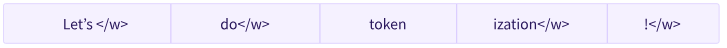

    Essas subpalavras acabam fornecendo muito significado semântico:
    por exemplo, no exemplo acima, "tokenization" foi dividido em "token"
    e "ization", dois tokens que têm um significado semântico enquanto
    sendo eficiente em termos de espaço (apenas dois tokens são necessários
    para representar uma palavra longa). Isso nos permite ter uma cobertura
    relativamente boa com vocabulários pequenos e quase nenhum token desconhecido.

    Essa abordagem é especialmente útil em línguas aglutinativas como o
    turco, onde você pode formar (quase) arbitrariamente longas palavras
    complexas juntando subpalavras.


**E ainda mais!**

    Não surpreendentemente, existem muitas outras técnicas por aí.
    Para citar algumas:

    1. BPE (Byte-Pair Encoding) em nível de byte, como usado no GPT-2;
    2. WordPiece, como usado no BERT;
    3. SentencePiece ou Unigram, como usado em vários modelos multilíngues.

    Agora você deve ter conhecimento suficiente sobre como os
    tokenizadores funcionam para começar a usar a API.

In [ ]:
# Importando o modelo Explicitamente:
from transformers import BertTokenizer

# Instanciando o modelo de tokenizador:
tokenizer_explicito = BertTokenizer.from_pretrained("bert-base-cased")

In [ ]:
# Importorando método de autotokenizer:
from transformers import AutoTokenizer

# Instanciando o modelo e forma implicita:
tokenizer_implicito = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
# Tokenizador Explicito:
exp = tokenizer_explicito("Eu gosto de maçã e de pera")

# Visualizando os valores por key:
for key in exp.keys():
  print(key)
  print(exp[key],'\n')

input_ids
[101, 142, 1358, 1301, 12223, 1260, 12477, 28201, 28199, 174, 1260, 1679, 1161, 102] 

token_type_ids
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

attention_mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 



In [ ]:
# Tokenizador Explicito:
imp = tokenizer_implicito("Eu gosto de maçã e de pera")

# Visualizando os valores por key:
for key in imp.keys():
  print(key)
  print(imp[key],'\n')

input_ids
[101, 142, 1358, 1301, 12223, 1260, 12477, 28201, 28199, 174, 1260, 1679, 1161, 102] 

token_type_ids
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

attention_mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 



**Salvando modelos**

In [ ]:
def nFolder(name):
  '''
    Função que cria uma pasta para acomodar
  os arquivos. Não que haja necessidade, mas
  só para ficar bem organizado a coisa.
  '''

  # Importando dependência:
  import os

  # Diretório (aqui usarei só a pasta):
  pasta = name

  # Verifique se o caminho não existe antes de criar
  if not os.path.exists(pasta):
      os.mkdir(pasta)
      print("Pasta criada com sucesso!")
  else:
      print("A pasta já existe.")

  return name

In [ ]:
# Criando pastas:
tokenizer_ep= nFolder('tokenizer_explicito')
tokenizer_imp = nFolder('tokenizer_implicito')

Pasta criada com sucesso!
Pasta criada com sucesso!


In [ ]:
# Salvando o modelos:
tokenizer_explicito.save_pretrained(tokenizer_ep)
tokenizer_implicito.save_pretrained(tokenizer_imp)

('tokenizer_implicito/tokenizer_config.json',
 'tokenizer_implicito/special_tokens_map.json',
 'tokenizer_implicito/vocab.txt',
 'tokenizer_implicito/added_tokens.json',
 'tokenizer_implicito/tokenizer.json')

**Conclusão**

    Estamos quase lá, o proximo tópico, já trataremos as etapas da
    tokenização e como a biblioteca transformer lida com isso.

# Tokenizador:

    O processo de tradução de texto para números, conhecido
    como codificação, ocorre em duas etapas: tokenização e
    conversão para IDs de entrada. Na tokenização, o texto é
    dividido em tokens, seguindo regras específicas definidas
    pelo modelo utilizado. Em seguida, esses tokens são
    convertidos em números usando um vocabulário específico
    do modelo. É importante garantir que o tokenizador e o
    vocabulário utilizados correspondam aos utilizados durante
    o treinamento do modelo.

In [ ]:
# Importando AutoTokenizer
from transformers import AutoTokenizer

In [ ]:
# Criando tokens:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Coma frutas porque faz bem para a saúde"
tokens = tokenizer.tokenize(sequence)

print(tokens)

['Co', '##ma', 'f', '##ru', '##tas', 'p', '##or', '##que', 'f', '##az', 'be', '##m', 'para', 'a', 'sa', '##ú', '##de']


    
    Este tokenizador é um tokenizador de subpalavras:
    ele divide as palavras até obter tokens que podem ser
    representados pelo seu vocabulário. Esse é o caso aqui
    com "transformer", que é dividido em dois tokens:
    "transform" e "##er".

**Encoding**
    
    A conversão para IDs de entrada é realizada pelo método
    do tokenizador convert_tokens_to_ids()

In [ ]:
# Convertando as IDs:
ids = tokenizer.convert_tokens_to_ids(tokens)

# Visualizando:
print(ids)

[3291, 1918, 175, 5082, 10401, 185, 1766, 3530, 175, 10961, 1129, 1306, 18311, 170, 21718, 12643, 2007]


    
    Essas saídas, uma vez convertidas para o tensor
    adequado do framework, podem então ser usadas como
    entradas para um modelo, como visto anteriormente
    neste capítulo.

**Decoding**

    A decodificação segue o caminho oposto: a partir de
    índices do vocabulário, queremos obter uma string.
    Isso pode ser feito com o método decode() da seguinte
    maneira:

In [ ]:
# Decodificando:
decoded_string = tokenizer.decode(ids)

# Visualizando a frase:
print(decoded_string)

Coma frutas porque faz bem para a saúde


    Muito legal, não... :>

**Conclusão**

    Observe que o método decode não apenas converte os índices de volta
    para tokens, mas também agrupa os tokens que faziam parte das mesmas
    palavras para produzir uma sentença legível. Esse comportamento será
    extremamente útil quando usarmos modelos que preveem novo texto (seja
    texto gerado a partir de um prompt, ou para problemas de sequência para
    sequência como tradução ou sumarização).

    Até agora, devemos entender as operações atômicas que um tokenizador
    pode manipular: tokenização, conversão para IDs e conversão de IDs de
    volta para uma string. No entanto, apenas arranhamos a superfície. Na
    próxima seção, levaremos nossa abordagem aos limites e examinaremos
    como superá-los.